### SNAO/North Atlantic Jet Exploration ###

We want to find out what is going on with the North Atlantic Jet and the SNAO during JJA. First we will look at reanalyis to try and diagnose the trends. Then we will look at what is going on in the dcppA-hindcast data. For this, we will consider u250/u300/u850 and MSLP fields for the summer NAO. First using reanalysis data back to 1940.

In [1]:
# Notebook magic
%matplotlib inline
# Import auto-reload
%load_ext autoreload
%autoreload 2

# Local imports
import os
import sys
import glob
import random

# Third-party imports
import numpy as np
import xarray as xr
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os.path
from pathlib import Path

# Import the cdsapi
import cdsapi


In [2]:
# Import the local functions
from JJA_SNAO_jet_functions import *

# Import the dictionaries
sys.path.append('/home/users/benhutch/skill-maps/')
import dictionaries as dicts

In [3]:
# Set up the cdsapi client
c = cdsapi.Client()

In [4]:
# Set up the parameters
model_variable = "u850"
obs_variable = "u"
level = "850"
experiment = "dcppA-hindcast"
start_year_mod = 1960
end_year_mod = 2018
start_year_obs = 1940
end_year_obs = 2023

In [5]:
# Set up the request dictionary for ERA5
request_dict_era5 = {
    'variable': 'u',
    'product_type': 'monthly_averaged_reanalysis',
    'year': [x for x in range(start_year_obs, end_year_obs)],
    'month': [x for x in range(6, 8 + 1)],
    'pressure_level': [850, 300, 250],
    'format': 'netcdf',
    'time': '00:00'
}

In [6]:
# Set up the target directory
# ----------------------------
target_dir = "/gws/nopw/j04/canari/users/benhutch/ERA5/"
era5_target_filename = "era5-monthly-u850-300-250-1940-2023.nc"

# Check if the target directory exists
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Form the path
era5_target_path = os.path.join(target_dir, era5_target_filename)

# Print the path
print(era5_target_path)

# If the path does not exist, then download the data
if not os.path.exists(era5_target_path):
    c.retrieve(
        "reanalysis-era5-pressure-levels-monthly-means",
        request_dict_era5,
        era5_target_path
    )
else:
    print("The file already exists")
    print("Skipping download")
    print("using the existing file: ", era5_target_path)

/gws/nopw/j04/canari/users/benhutch/ERA5/era5-monthly-u850-300-250-1940-2023.nc
The file already exists
Skipping download
using the existing file:  /gws/nopw/j04/canari/users/benhutch/ERA5/era5-monthly-u850-300-250-1940-2023.nc


In [7]:
# Set up another request for psl back to 1940
# -------------------------------------------
request_dict_era5_psl = {
    'variable': 'mean_sea_level_pressure',
    'product_type': 'monthly_averaged_reanalysis',
    'year': [x for x in range(start_year_obs, end_year_obs)],
    'month': [x for x in range(6, 8 + 1)],
    'format': 'netcdf',
    'time': '00:00'
}

### Download psl for SNAO ###

Set this going at the end of the day

In [8]:
# # Set up the target filename
# era5_target_filename_psl = "era5-monthly-psl-1940-2023.nc"

# # Check if the target directory exists
# if not os.path.exists(target_dir):
#     os.makedirs(target_dir)

# # Form the path
# era5_target_path_psl = os.path.join(target_dir, era5_target_filename_psl)

# # Print the path
# print(era5_target_path_psl)

# # If the path does not exist, then download the data
# if not os.path.exists(era5_target_path_psl):
#     c.retrieve(
#         "reanalysis-era5-single-levels-monthly-means",
#         request_dict_era5_psl,
#         era5_target_path_psl
#     )
# else:
#     print("The file already exists")
#     print("Skipping download")
#     print("using the existing file: ", era5_target_path_psl)

In [9]:
# Calculate the climatology for the full period, U250
# -------------------------
climatology_era5_u250 = calculate_climatology(
    data_path=era5_target_path,
    variable="u",
    season="JJA",
    region=dicts.pacific_grid_plot_test,
    level=250
)

In [10]:
climatology_era5_u250

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 321)
Coordinates:
  * longitude  (longitude) float32 180.0 180.2 180.5 180.8 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 10.5 10.25 10.0
    level      int32 250
Data variables:
    u          (latitude, longitude) float32 dask.array<chunksize=(321, 720), meta=np.ndarray>

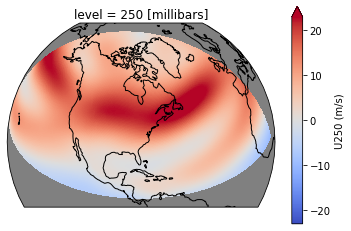

In [11]:
# Plot the climatology
# --------------------
# Assuming climatology_era5_u250 is an xarray DataArray
# First extract the data
climatology_era5_u250_data = climatology_era5_u250.u

# Then plot the data
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"))

# Plot the data
climatology_era5_u250_data.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={
        "label": "U250 (m/s)"
    }
)

# Add coastlines
ax.coastlines()

In [12]:
# Test the new function
# ---------------------
swj_index = diagnose_swj_index(
    data_path=era5_target_path,
    start_year=start_year_obs,
    end_year=end_year_obs,
)

(361,)
(83, 361)
(83,)
[53.75 52.25 52.25 50.   51.   50.75 50.5  48.5  50.25 50.25 49.75 51.
 55.75 50.5  50.5  56.25 49.75 50.75 47.   52.75 49.5  54.25 52.25 50.25
 55.75 49.5  49.25 54.25 47.5  52.5  55.   55.   55.5  54.   52.   57.25
 55.75 53.25 52.5  54.5  49.5  55.75 47.   62.   57.75 50.5  50.   52.75
 50.5  56.5  52.75 49.25 50.   53.   51.5  58.25 51.5  48.   51.5  51.25
 45.25 52.25 52.25 47.75 47.25 55.   53.   47.75 49.75 46.75 51.25 50.
 46.   51.75 48.5  48.5  50.   51.   55.   48.25 49.25 47.25 53.  ]


In [13]:
print(swj_index)

          0
1940  53.75
1941  52.25
1942  52.25
1943  50.00
1944  51.00
...     ...
2018  55.00
2019  48.25
2020  49.25
2021  47.25
2022  53.00

[83 rows x 1 columns]


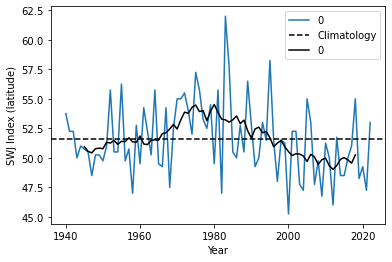

In [14]:
fig, ax = plt.subplots()

# Add a label to the plot
swj_index.plot(ax=ax, label='SWJ Index')

# Include the climatology of the SWJ index as a horizontal line
climatology_swj_index = swj_index.mean()

# Add the climatology as a horizontal line
ax.axhline(climatology_swj_index[0], color="k", linestyle="--", label="Climatology")

# Label the axes
ax.set_xlabel("Year")
ax.set_ylabel("SWJ Index (latitude)")

# Include a rolling 10-year mean
swj_index.rolling(10, center=True).mean().plot(ax=ax, color="k", label="10-year rolling mean")

# Add a legend
ax.legend()

### SWJ index ###

Breaks down into three phases?

* Poleward - 1940-1980
* Equatorward - 1980-2010
* Poleward - 2010-onwards

In [ ]:
# Calculate the climatology for the early period
years = [x for x in range(1940, 1980)]

climatology_era5_u250_early = calculate_climatology(
    data_path=era5_target_path,
    variable="u",
    season="JJA",
    region=dicts.pacific_grid_plot_test,
    level=250,
    years=years
)

# Calculate the climatology for the late period
years = [x for x in range(1980, 2010)]

climatology_era5_u250_late = calculate_climatology(
    data_path=era5_target_path,
    variable="u",
    season="JJA",
    region=dicts.pacific_grid_plot_test,
    level=250,
    years=years
)

# Calculate the climatology for the recent period
years = [x for x in range(2010, 2023)]

climatology_era5_u250_recent = calculate_climatology(
    data_path=era5_target_path,
    variable="u",
    season="JJA",
    region=dicts.pacific_grid_plot_test,
    level=250,
    years=years
)


In [ ]:
# Calculate the deviation of these from the full climatology
climatology_era5_u250_early_deviation = climatology_era5_u250_early.u - climatology_era5_u250.u

climatology_era5_u250_late_deviation = climatology_era5_u250_late.u - climatology_era5_u250.u

climatology_era5_u250_recent_deviation = climatology_era5_u250_recent.u - climatology_era5_u250.u

In [ ]:
# Plot the deviation
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"))

# Plot the data
climatology_era5_u250_early_deviation.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={
        "label": "U250 (m/s)"
    }
)

# Add coastlines
ax.coastlines()


In [ ]:
# Plot the deviation
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"))

# Plot the data
climatology_era5_u250_late_deviation.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={
        "label": "U250 (m/s)"
    }
)

# Add coastlines
ax.coastlines()

In [ ]:
# Plot the deviation
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"))

# Plot the data
climatology_era5_u250_recent_deviation.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={
        "label": "U250 (m/s)"
    }
)

# Add coastlines
ax.coastlines()